In [3]:
import pandas_datareader as pdr
import pandas_datareader.data as web

from pprint import pprint
import numpy as np
import pandas as pd
#import pyfolio as pf
#import quantstats as qs
from datetime import date
from pandas_datareader.famafrench import get_available_datasets
from scipy.stats import spearmanr, pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statsmodels.api import OLS, add_constant
from pathlib import Path
import seaborn as sns 
from linearmodels.asset_pricing import TradedFactorModel, LinearFactorModel, LinearFactorModelGMM
#import finance_db

In [4]:
# We will be using the five Fama—French factors that result from sorting stocks first into three size groups 
# and then into two for each of the remaining three firm-specific factors.

# Hence, the factors involve three sets of value-weighted portfolios formed as 3 x 2 sorts 
# on size and book-to-market, size and operating profitability, and size and investment. 
# The risk factor values are computed as the average returns of the portfolios (PF) Mkt-RF, SMB, HML, RMW, CMA, RF

In [5]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'

In [6]:
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2020-12')[0]

In [7]:
ff_factor_data.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.35,0.43,-1.23,0.44,0.00
2010-02,3.40,1.51,3.22,-0.28,1.40,0.00
2010-03,6.31,1.85,2.21,-0.63,1.67,0.01
2010-04,2.00,4.98,2.89,0.70,1.74,0.01
2010-05,-7.89,0.04,-2.44,1.27,-0.23,0.01


In [8]:
# Fama and French also make numerous portfolios that we can illustrate the estimation of the risk factor exposures, 
# as well as the value of the risk premia available in the market for a given time period. 
# We will use a panel of the 17 industry portfolios at a monthly frequency.

ff_portfolio = '17_Industry_Portfolios'

In [9]:
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2020-12')[0]

In [10]:
ff_portfolio_data.head(10)

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-01,-2.06,-12.89,-4.83,-3.47,-3.51,-4.43,-0.44,-2.88,-11.92,-2.98,-7.33,-0.15,-2.11,-4.49,-1.30,-1.07,-4.84
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.06,7.24,3.22,11.14,5.56,7.51,3.27,5.55,12.04,5.30,7.76,8.88,9.00,3.13,6.47,8.17,6.44
2010-04,-1.28,-0.84,4.32,4.76,6.88,2.49,-1.96,10.87,-2.63,3.44,4.82,6.76,3.07,2.85,1.36,0.93,1.73
2010-05,-4.81,-7.95,-10.10,-5.98,-5.51,-10.56,-6.27,-8.08,-7.01,-8.99,-8.09,-6.88,-7.60,-6.29,-5.71,-9.21,-7.88
2010-06,-1.90,-7.08,-6.15,-9.68,-8.75,-7.96,-0.10,-14.15,-13.18,-6.37,-5.97,-7.68,-7.30,-0.69,-9.17,-7.36,-5.68
2010-07,6.68,9.58,7.43,8.22,4.01,14.76,3.47,4.56,8.28,10.40,7.48,16.36,9.77,6.80,4.92,6.65,7.92
2010-08,-0.68,-0.34,-3.37,-7.27,-3.84,-0.08,-0.44,-4.43,-8.74,-3.23,-9.06,-8.60,-6.41,0.38,-3.41,-8.43,-4.58
2010-09,3.16,11.74,9.06,17.20,11.63,10.00,7.07,10.49,12.10,10.84,14.15,12.54,9.94,3.65,12.45,7.46,10.78


In [11]:
betas = []
for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry], exog=add_constant(ff_factor_data)).fit()
    betas.append(step1.params.drop('const'))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
betas = pd.DataFrame(betas, columns=ff_factor_data.columns, index=ff_portfolio_data.columns)

In [13]:
betas

,Mkt-RF,SMB,HML,RMW,CMA,RF
Food,0.710325,-0.255423,-0.115929,0.383415,0.365924,-2.805290
Mines,1.140722,0.308451,0.060752,0.119230,0.617030,5.797134
Oil,1.250931,0.482872,0.632598,0.256265,0.414208,0.258764
Clths,0.929701,0.492176,0.038791,0.677804,-0.251721,1.781105
Durbl,1.128711,0.479830,-0.115270,0.307926,0.088253,-1.629089
Chems,1.183091,0.186149,0.226642,0.029141,-0.153252,-7.023383
Cnsum,0.742742,-0.275331,-0.400473,0.054507,0.564644,-3.593219
Cnstr,1.110134,0.253811,0.034046,0.086417,-0.002424,0.065848
Steel,1.324525,0.572355,0.377182,0.051511,0.426405,2.298541
FabPr,1.000190,0.423620,0.039480,0.069280,0.000574,3.963924


In [14]:
lambdas = []
for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index], exog=betas).fit()
    lambdas.append(step2.params)

In [15]:
lambdas = pd.DataFrame(lambdas, index=ff_portfolio_data.index, columns=betas.columns.tolist())

In [16]:
lambdas.head(10)

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.250443,-0.454899,-2.192042,1.115966,-3.961546,-0.483146
2010-02,4.238023,6.367368,-5.561109,-1.625272,-1.092608,0.222858
2010-03,6.516204,-1.010825,0.488708,3.041934,-3.061235,0.190492
2010-04,2.323306,4.127008,-2.297218,2.873383,-6.150911,-0.075375
2010-05,-7.844147,4.822984,-3.359843,-0.798164,0.984895,-0.039045
2010-06,-6.186046,-5.114568,1.114240,-0.177400,2.931987,-0.073285
2010-07,7.582767,-0.730424,1.601629,3.058893,-1.436987,-0.140073
2010-08,-4.330944,-1.787405,0.707402,-0.283983,4.801281,-0.314404
2010-09,9.537342,2.164238,-4.897301,3.622864,-5.061493,0.383917


In [17]:
# Finally, we compute the average for the 96 periods to obtain our factor risk premium
lambdas.mean()

Mkt-RF    1.297996
SMB      -0.568562
HML      -1.067468
RMW       0.506481
CMA      -1.102056
RF        0.012825
dtype: float64

In [18]:
model = LinearFactorModel(portfolios=ff_portfolio_data, factors=ff_factor_data)
result = model.fit()

In [19]:
result

LinearFactorModel Estimation Summary                      
================================================================================
No. Test Portfolios:                 17   R-squared:                      0.7324
No. Factors:                          6   J-statistic:                    14.707
No. Observations:                   132   P-value                         0.1963
Date:                  Fri, Oct 08 2021   Distribution:                 chi2(11)
Time:                          00:30:58                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.2980     0.3960     3.2780     0.0010      0.5219      2.0741
SMB           -0.5686     0.6321    -0.8994     0.3684     -1.8075      0.6704
HML           -1.0675     0.5132    -2.0798     0.0375     -2.0734     -0.0615
RMW            0.5065     0.6489     0.7806     0.4351     -0.7653      1.7782
CMA           -1.1021     0.5000    -2.2043     0.0275     -2.0820     -0.1222
RF             0.0128     0.0457     0.2809     0.7788     -0.0767      0.1023
==============================================================================

Covariance estimator:
HeteroskedasticCovariance
See full_summary for complete results
LinearFactorModelResults, id: 0x7f83eba5eb50

In [20]:
#Equity Data - Vanguard Sector & specialty ETFs

In [21]:
symbols = ['VOX', 'VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU']
secs = ['COMM', 'CONSUMER DISC', 'CONSUMER ST', 'ENERGY', 'FINANCIALS', 'HEALTH', 'INDUSTRIALS', 
           'TECHNOLOGY', 'MATIREALS', 'REAL ESTATE', 'UTILITIES']

In [22]:
start = pd.Timestamp('2010')
end = pd.Timestamp('2020-12')

In [23]:
def get_symbols(symbols,data_source,ohlc,begin_date=None,end_date=None):
    out = []
    new_symbols = []
    
    for symbol in symbols:
        df = web.DataReader(symbol, data_source, begin_date, end_date)\
        [['High','Low','Open','Close','Volume','Adj Close']]
        new_symbols.append(symbol) 
        out.append(df[ohlc].astype('float'))
        data = pd.concat(out, axis = 1)
        data.columns = new_symbols
        
    return data

In [24]:
prices = get_symbols(symbols,data_source='yahoo',ohlc='Adj Close', begin_date=start, end_date=end)

SPY = web.DataReader('SPY', 'yahoo', start, end)\
      [['High','Low','Open','Close','Volume','Adj Close']]

In [25]:
prices.head()

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
Date,,,,,,,,,,,
2010-01-04,43.386726,40.879322,49.588451,63.985840,23.370375,46.846153,43.845573,49.731968,56.640862,28.118277,44.064602
2010-01-05,43.679886,41.139481,49.633293,64.640808,23.631187,46.556236,44.037521,49.678486,56.981327,28.086721,43.654045
2010-01-06,42.988335,41.182846,49.625820,65.385109,23.670712,46.820568,44.146004,49.330906,57.783886,28.036234,43.849236
2010-01-07,42.830494,41.538399,49.625820,65.228806,24.129105,46.982574,44.688435,49.143742,57.532589,28.339191,43.654045
2010-01-08,42.635059,41.573078,49.356800,65.720047,24.034264,47.153114,45.280949,49.526974,58.156792,28.130905,43.606937


In [26]:
#prices.columns = secs
prices['SPY'] = SPY.Close.values

In [27]:
returns0 = prices.pct_change()
returns0 = returns0.dropna(how='all').dropna(axis=1)
returns0

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU,SPY
Date,,,,,,,,,,,,
2010-01-05,0.006757,0.006364,0.000904,0.010236,0.011160,-0.006189,0.004378,-0.001075,0.006011,-0.001122,-0.009317,0.002647
2010-01-06,-0.015832,0.001054,-0.000151,0.011514,0.001673,0.005678,0.002463,-0.006997,0.014085,-0.001798,0.004471,0.000704
2010-01-07,-0.003672,0.008634,0.000000,-0.002391,0.019365,0.003460,0.012287,-0.003794,-0.004349,0.010806,-0.004451,0.004221
2010-01-08,-0.004563,0.000835,-0.005421,0.007531,-0.003931,0.003630,0.013259,0.007798,0.010850,-0.007350,-0.001079,0.003328
2010-01-11,0.000881,-0.001251,0.003482,-0.000793,-0.000329,0.005063,0.009399,-0.004319,-0.003345,0.005834,0.007717,0.001397
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,0.017100,0.017385,0.007777,0.050674,0.034941,0.001036,0.018930,0.011868,0.024853,0.005308,0.013768,0.016114
2020-11-25,-0.000520,0.004549,-0.001451,-0.021639,-0.004803,-0.002117,-0.008674,0.004680,-0.011609,0.000587,0.001920,-0.001542
2020-11-27,0.006590,0.006165,0.001046,-0.011434,-0.004116,0.013577,-0.000355,0.007410,0.004307,-0.004457,-0.009368,0.002785


In [28]:
def r2(x, y):
    return pearsonr(x, y)[0] ** 2

In [29]:
tmp_fts = returns0.copy()
tmp_fts

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU,SPY
Date,,,,,,,,,,,,
2010-01-05,0.006757,0.006364,0.000904,0.010236,0.011160,-0.006189,0.004378,-0.001075,0.006011,-0.001122,-0.009317,0.002647
2010-01-06,-0.015832,0.001054,-0.000151,0.011514,0.001673,0.005678,0.002463,-0.006997,0.014085,-0.001798,0.004471,0.000704
2010-01-07,-0.003672,0.008634,0.000000,-0.002391,0.019365,0.003460,0.012287,-0.003794,-0.004349,0.010806,-0.004451,0.004221
2010-01-08,-0.004563,0.000835,-0.005421,0.007531,-0.003931,0.003630,0.013259,0.007798,0.010850,-0.007350,-0.001079,0.003328
2010-01-11,0.000881,-0.001251,0.003482,-0.000793,-0.000329,0.005063,0.009399,-0.004319,-0.003345,0.005834,0.007717,0.001397
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,0.017100,0.017385,0.007777,0.050674,0.034941,0.001036,0.018930,0.011868,0.024853,0.005308,0.013768,0.016114
2020-11-25,-0.000520,0.004549,-0.001451,-0.021639,-0.004803,-0.002117,-0.008674,0.004680,-0.011609,0.000587,0.001920,-0.001542
2020-11-27,0.006590,0.006165,0.001046,-0.011434,-0.004116,0.013577,-0.000355,0.007410,0.004307,-0.004457,-0.009368,0.002785


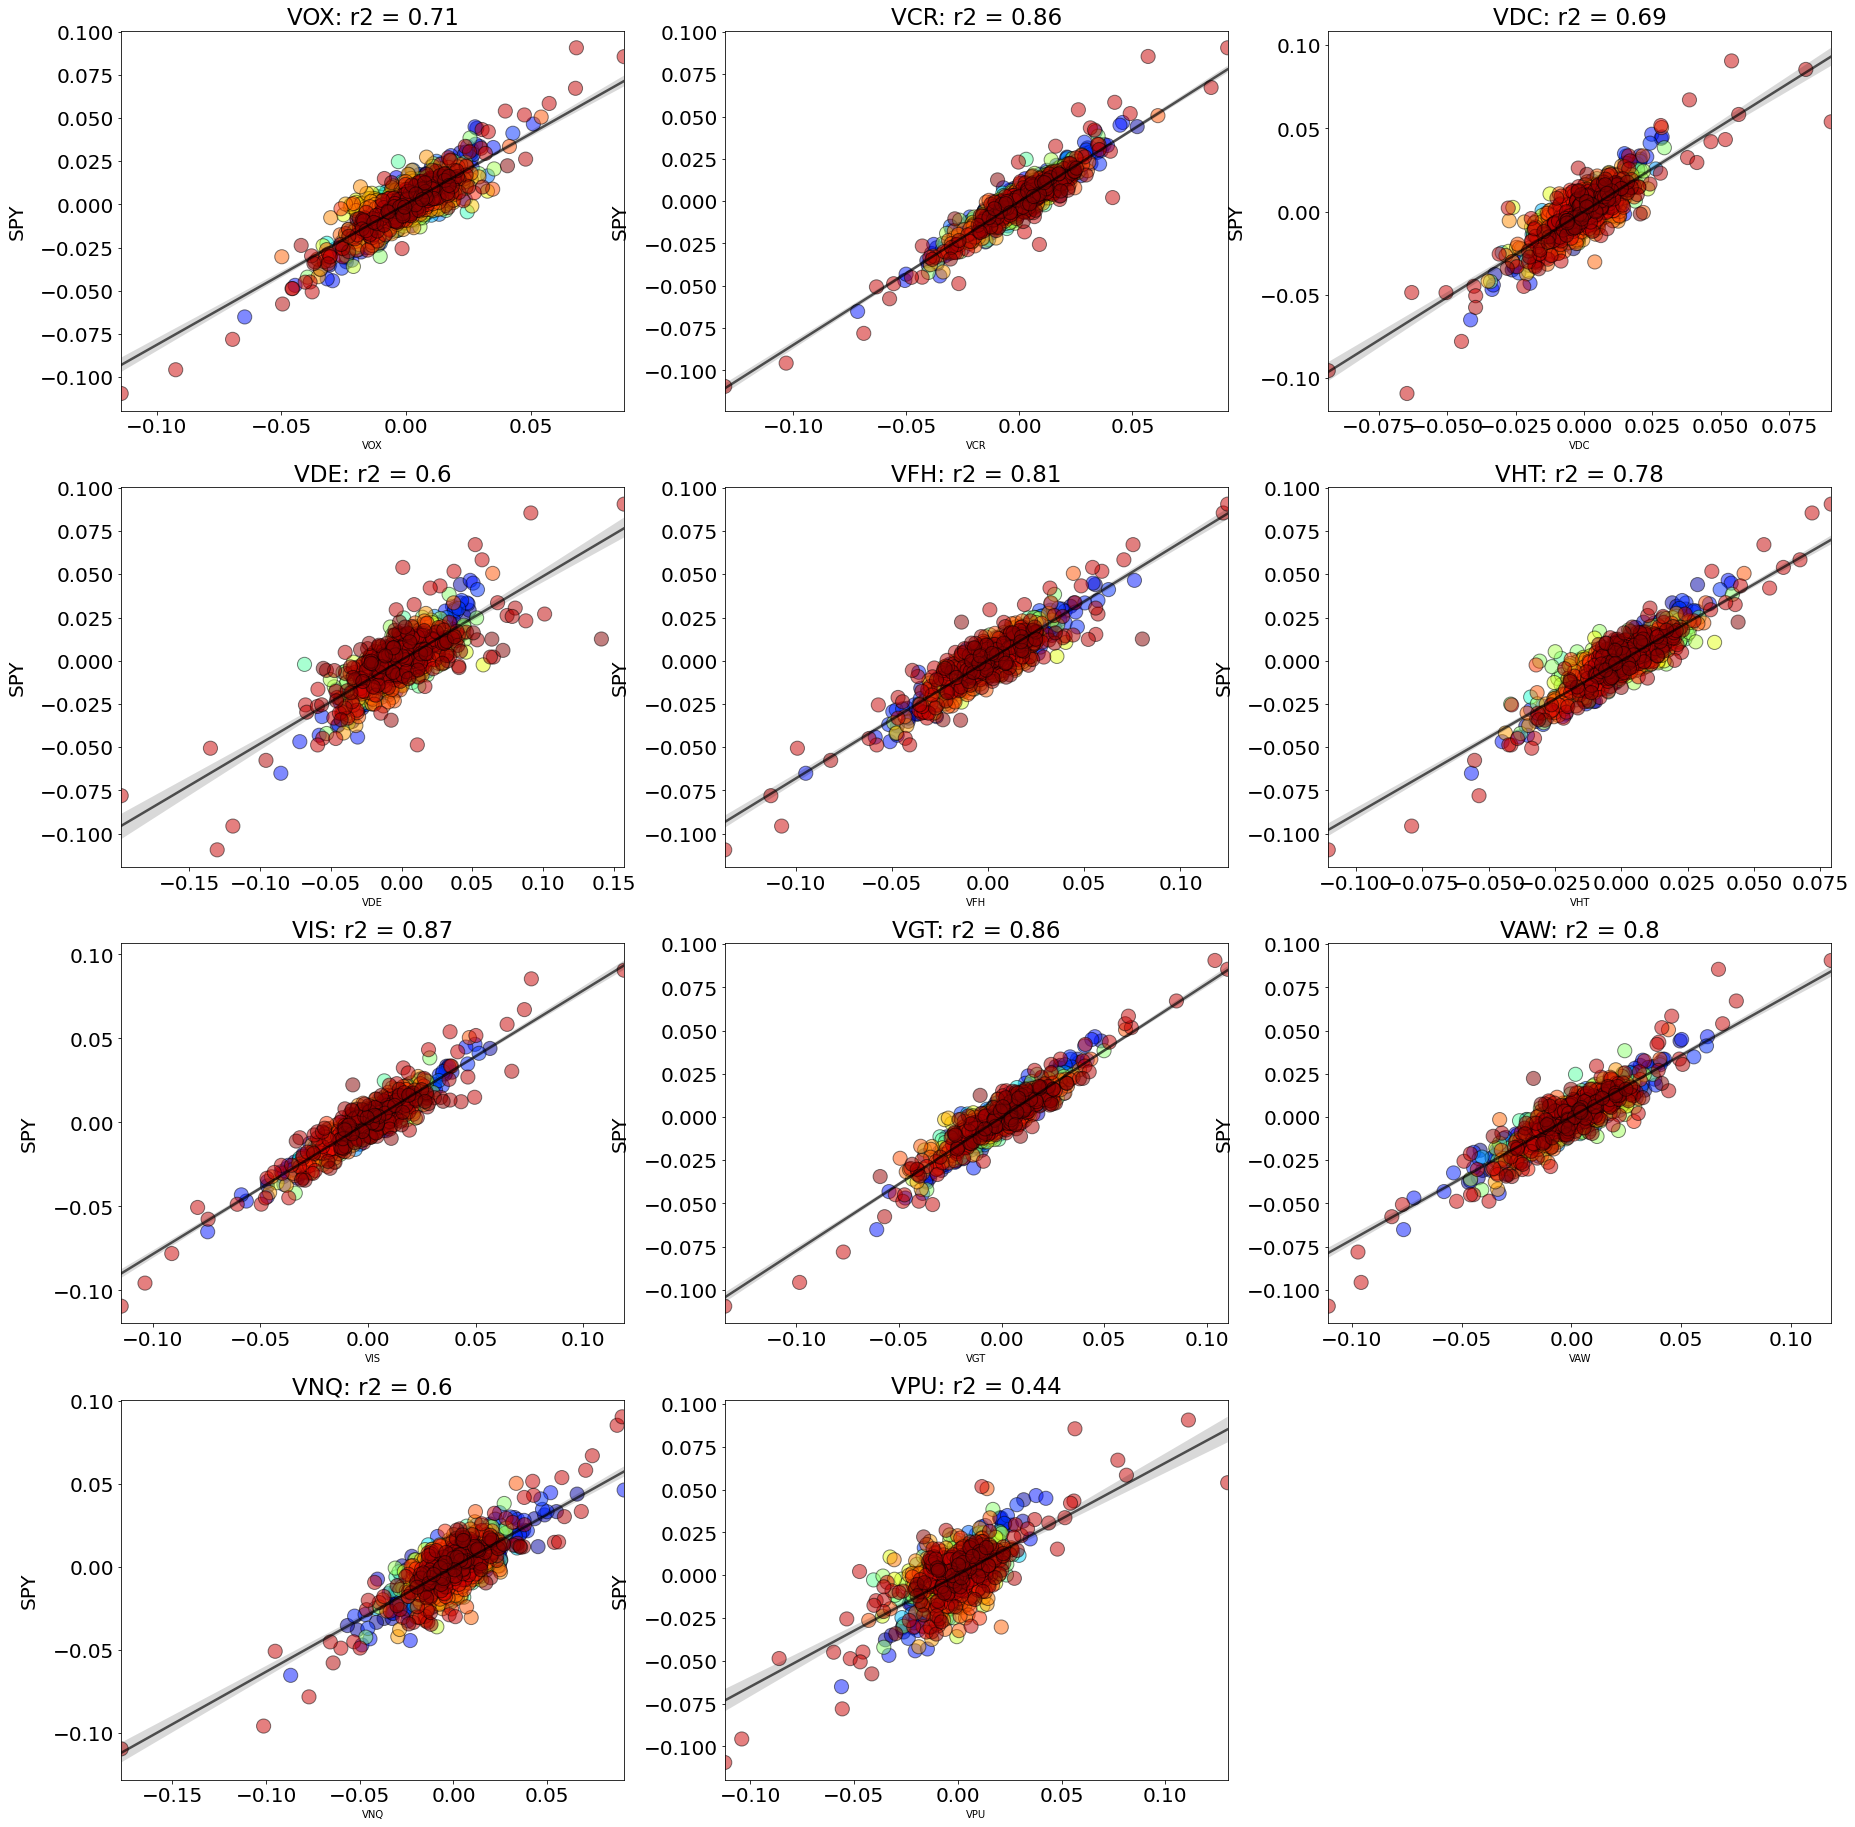

In [31]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(10, 40))
plt.subplots_adjust(right=2.5)
plt.subplots_adjust(top=2)

cm = plt.get_cmap('jet')
colors = np.linspace(0.1, 1, len(tmp_fts))

for i, feature in enumerate(list(tmp_fts), 1):
    if(feature=='SPY'):
        break
        
    ic, pval = spearmanr(tmp_fts[feature], tmp_fts['SPY'])
    R2 = r2(tmp_fts[feature], tmp_fts['SPY'])
        
    plt.subplot(len(list(tmp_fts.columns)), 3, i)
    sc = plt.scatter(tmp_fts[feature], tmp_fts['SPY'], s=200, 
                 edgecolor='k', alpha=0.5, label='Price Data', c=colors, cmap=cm)
    j = sns.regplot(tmp_fts[feature], tmp_fts['SPY'], data=tmp_fts, scatter=False, label=False, 
                line_kws={'color':'k','lw':2.5, 'alpha':0.65})
    
    plt.ylabel('SPY', size=23, labelpad=14, fontsize=20, fontweight='medium')
    
    plt.title(f'{feature}: r2 = {round(R2,2)}', fontsize=23, fontweight='medium')
    plt.grid(False)
            
    for j in range(2):
        plt.tick_params(axis='x', labelsize=20)
        plt.tick_params(axis='y', labelsize=20)
        
plt.show()

In [52]:
excess_returns = returns.sub(ff_factor_data.RF, axis=0)
excess_returns

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU,SPY
Date,,,,,,,,,,,,
2010-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02,1.189332,5.922353,3.043350,2.431071,3.509382,0.532894,4.933620,4.505757,5.089096,5.583157,-0.963853,3.119470
2010-03,6.549240,8.397533,4.092029,2.767103,8.852032,3.609082,8.656919,6.694651,8.117100,9.355898,2.050011,5.642883
2010-04,0.790571,6.274625,-1.056000,4.465651,2.364346,-2.726523,4.351429,2.197187,1.021370,7.140170,2.977929,1.537006
2010-05,-4.457583,-7.199073,-4.976696,-11.950294,-8.835302,-6.936563,-8.951063,-8.003724,-8.945812,-5.344610,-5.874202,-7.955455
2010-06,-1.967882,-10.060346,-2.630749,-5.767542,-6.782386,-2.133515,-6.994823,-6.388956,-7.810985,-6.109771,-1.813276,-5.633115
2010-07,9.127148,8.020139,6.280096,8.021310,6.935432,0.965314,9.917264,7.187738,11.932035,9.583459,7.318880,6.820067
2010-08,-1.045730,-4.792785,-1.820692,-4.470544,-7.597809,-2.060071,-7.574377,-6.931920,-2.732812,-1.285764,1.016592,-4.508050
2010-09,9.461474,12.421985,5.957022,10.032569,6.192945,9.730391,11.791127,12.654641,8.432956,3.528773,2.268681,8.365273


In [53]:
excess_returns = excess_returns.clip(lower=np.percentile(excess_returns, 1),
                                     upper=np.percentile(excess_returns, 99))

In [19]:
from factor_analyzer import FactorAnalyzer

In [20]:
df= pd.read_csv("bfi.csv")

In [21]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [22]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [23]:
# Dropping missing values rows
df.dropna(inplace=True)

In [24]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [25]:
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 
# using the observed correlation matrix against the identity matrix. If the test found statistically 
# insignificant, you should not employ a factor analysis.

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.199553924966, 0.0)

In [26]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. Lower proportion id 
# more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 
# is considered inadequate.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [27]:
kmo_model

0.8482210116350438

In [ ]:
# The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed 
# with your planned factor analysis.

In [28]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

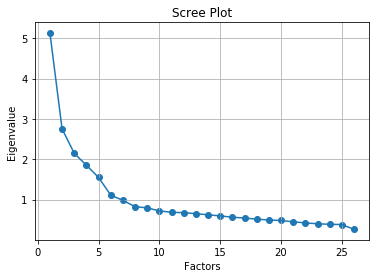

In [29]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [30]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [31]:
fa.loadings_

array([[-0.02290301, -0.03247244,  0.03316871, -0.03809335,  0.00379506,
         0.10374847],
       [ 0.09939617,  0.06047379,  0.02669442, -0.53078469, -0.12030937,
         0.16363839],
       [ 0.03176731,  0.259875  ,  0.1402256 ,  0.64656947,  0.05577021,
        -0.09704963],
       [-0.00525556,  0.40884857,  0.10953353,  0.5870038 ,  0.01618433,
         0.03914857],
       [-0.07926603,  0.25534237,  0.22930808,  0.39176034, -0.13629257,
         0.03340065],
       [-0.14364476,  0.4910488 ,  0.0856494 ,  0.45108988,  0.00911123,
         0.10588827],
       [ 0.00562295,  0.12364715,  0.54015018,  0.00422137,  0.18345833,
         0.13879815],
       [ 0.08435816,  0.10650466,  0.65249593,  0.05653766,  0.0792028 ,
         0.20858043],
       [-0.03394649,  0.0497959 ,  0.54587749,  0.10028627, -0.0123717 ,
         0.05447959],
       [ 0.23161662,  0.0089893 , -0.67278538, -0.08998026, -0.15345088,
         0.226977  ],
       [ 0.29340234, -0.1436436 , -0.55970426, -0.

In [32]:
fa.get_eigenvalues()

(array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
        1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
        0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
        0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
        0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
        0.2622634 ]),
 array([ 4.62191839,  2.28859647,  1.58790406,  1.24418004,  0.99409393,
         0.52995489,  0.259123  ,  0.21162857,  0.12587991,  0.1063192 ,
         0.07945485,  0.04230637,  0.03296059,  0.02370407,  0.00743354,
        -0.02211494, -0.04170331, -0.04794389, -0.05856486, -0.06102634,
        -0.08061162, -0.08700374, -0.10017992, -0.10984112, -0.12540813,
        -0.15441251]))

In [4]:
>>> import numpy as np
>>> from sklearn.linear_model import LinearRegression
>>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = np.dot(X, np.array([1, 2])) + 3
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)

1.0

In [5]:
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [6]:
y

array([ 6,  8,  9, 11])

In [8]:
import pandas as pd
df = pd.DataFrame([[0, 1, -2, -1], [1, 1, 1, 1]])
s = pd.Series([1, 1, 2, 1])

In [9]:
df

,0,1,2,3
0,0,1,-2,-1
1,1,1,1,1


In [10]:
s

0    1
1    1
2    2
3    1
dtype: int64

In [11]:
df.dot(s)

0   -4
1    5
dtype: int64